## Exploratory data analysis: Getting insights from data

### 1. Import library

In [1]:
import pandas as pd
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from Visualize.make_dataframe import make_dataframe
from Visualize.retrieve_topic import retrieve_topic
from Visualize.visualize_frequency_words import visualize_frequency_words

### 2. Get data from Mongodb and convert to dataframe

In [2]:
df = pd.DataFrame()
df = make_dataframe()
df.head(3)

,title,content,url,label,imageURL,domain,topic,date
0,Bức vẽ giúp bạn đánh giá mức độ stress của bản...,"[tranh, vòng_tròn, chuyển_động, chậm_rãi, hình...",https://suckhoe.vnexpress.net/tin-tuc/tu-van/b...,1,https://i-suckhoe.vnecdn.net/2018/11/16/onh-15...,suckhoe.vnexpress.net,None,2018-11-17 12:15:00
1,KHẨN CẤP: Hàng loạt trẻ em nhập viện vì ngộ độ...,"[xét_nghiệm, ban_đầu, trẻ, nhập_viện, bé, dấu_...",http://phapluat.news/khan-cap-hang-loat-tre-em...,1,http://img-static.phapluat.news/2017/10/H1.jpg,phapluat.news,None,2017-10-04 14:29:00
2,"Không đủ tiền tiêu hủy, Chi cục Thú y đề nghị ...","[28, 9, ubnd, thành_phố, chi_cục, thú_i, văn_b...",http://phapluat.news/khong-du-tien-tieu-huy-ch...,1,http://img-static.phapluat.news/2017/09/h1-4.jpg,phapluat.news,None,2017-09-28 11:48:06


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6022 entries, 0 to 6021
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     6022 non-null   object
 1   content   6022 non-null   object
 2   url       6022 non-null   object
 3   label     6022 non-null   int64 
 4   imageURL  6022 non-null   object
 5   domain    6022 non-null   object
 6   topic     5780 non-null   object
 7   date      6009 non-null   object
dtypes: int64(1), object(7)
memory usage: 376.5+ KB


### 3. Get insights

3.1 Get brief infomation

In [4]:
print("Shape:",df.shape)
print("Columns:", df.columns.tolist())

Shape: (6022, 8)
Columns: ['title', 'content', 'url', 'label', 'imageURL', 'domain', 'topic', 'date']


3.2 Check whether the distribution of classes is different

<AxesSubplot: ylabel='label'>

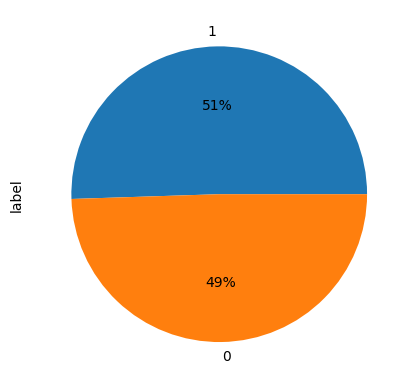

In [5]:
df['label'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')

3.3 Statistical information of content

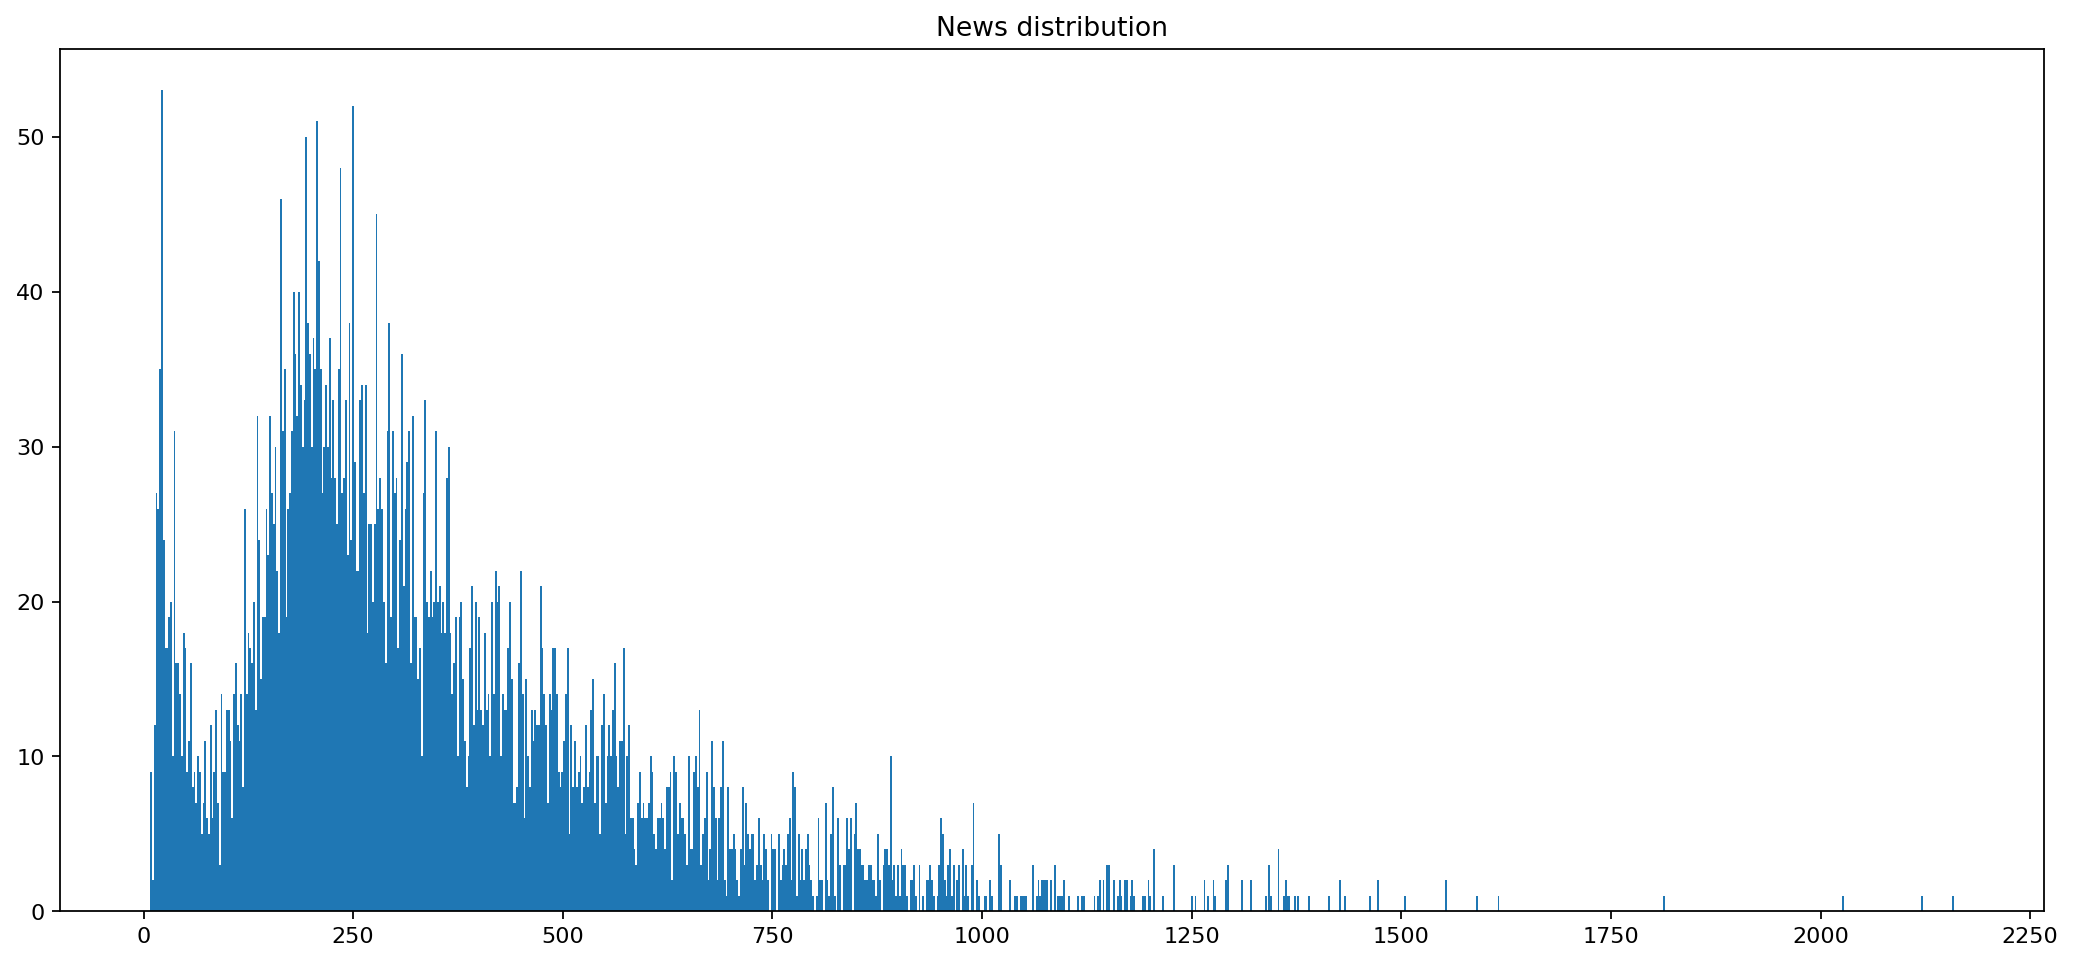

In [6]:
#doc_lens = [get_len(d) for d in df.content]
doc_lens = [len(d) for d in df.content]
plt.figure(figsize=(16,7), dpi=160)
plt.locator_params(axis='x', nbins = 10)
plt.hist(doc_lens, bins = 1000);
plt.title("News distribution");

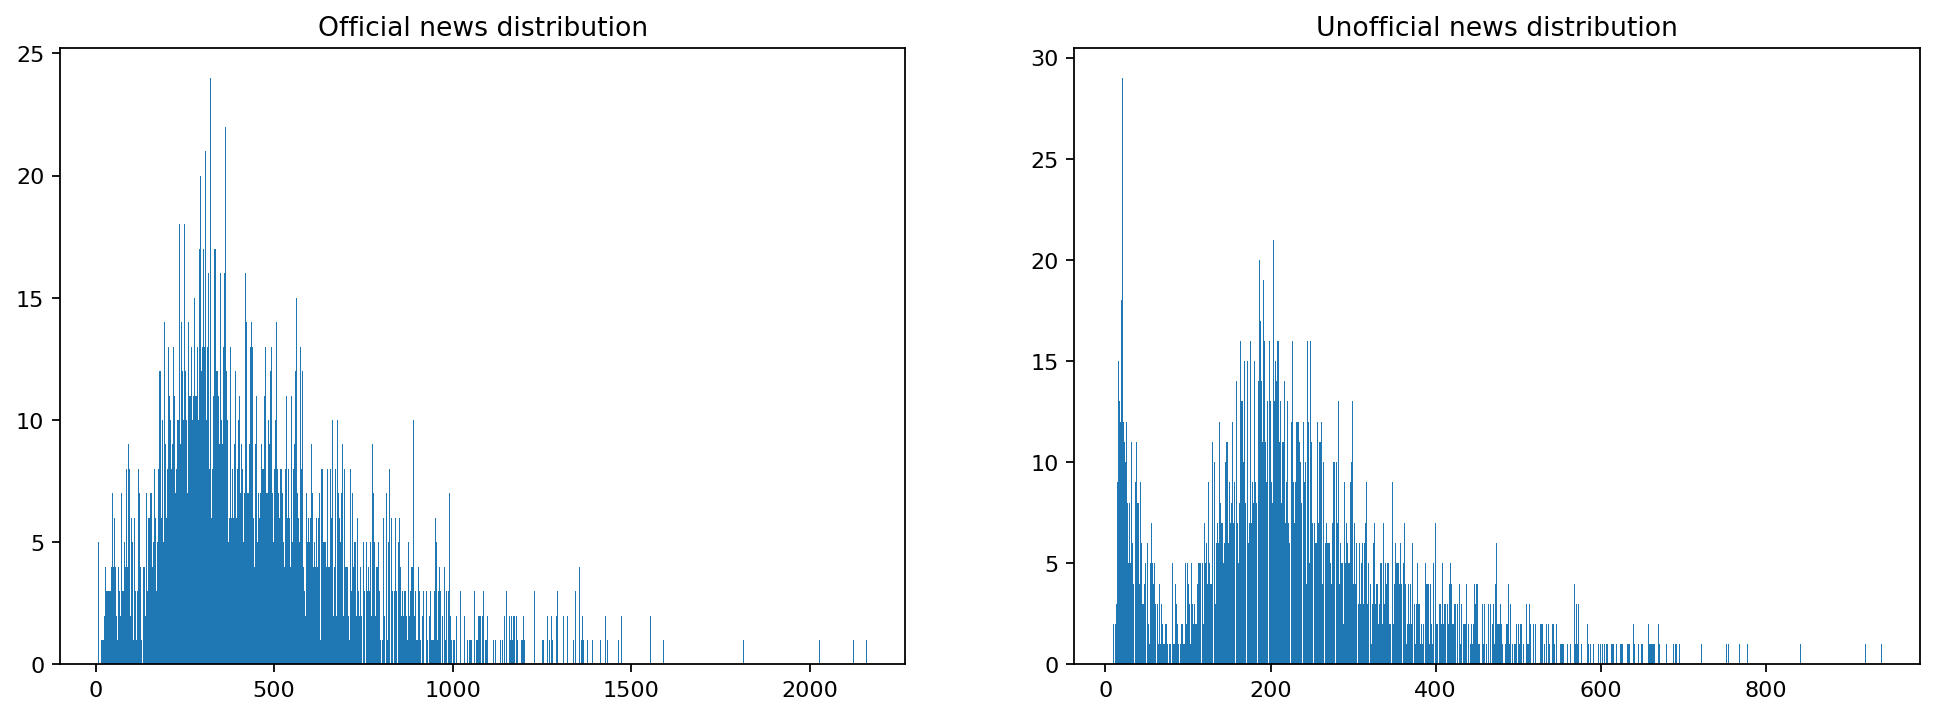

In [7]:
fake_df = df[df['label'] == 1]
real_df = df[df['label'] == 0]
fake_doc_lens = [len(d) for d in fake_df.content]
real_doc_lens = [len(d) for d in real_df.content]

fig, axes = plt.subplots(1,2,figsize=(15,5), dpi=160)
axes[0].hist(fake_doc_lens, bins = 1000);
axes[0].set_title("Official news distribution");

axes[1].hist(real_doc_lens, bins = 1000);
axes[1].set_title("Unofficial news distribution");

3.4 Find out news trends from data collected on each general topic

3.4.1 Topic extraction for each news

In [8]:
df['topic_extract'] = pd.Series()
for i in range(df.shape[0]):
    df['topic_extract'][i] = retrieve_topic(df['content'][i])

In [9]:
pd.set_option('display.max_colwidth', None)
df['topic_extract']

0       [hình_ảnh, chuyển_động, alic, ảnh, tiến_sĩ, thần_kinh, hiệu_ứng, nhận_thức, proverbio, thị_giác]
1                              [thuốc, heo, tiêm, an_thần, bé, nhập_viện, trẻ, trường, ban_đầu, cấp_cứu]
2                               [chó, chi_cục, cầm_viên, thảo, hoang, đem, thú, tiêu_hủi, sư_tử, cán_bộ]
3                                       [chó, bắt, chi_cục, thú_i, đội, tp, hcm, săn_bắt, rông, công_an]
4                     [xăng, dầu, doanh_nghiệp, hiệp_hội, việt_nam, iq8, trạm, nước_ngoài, hàng, hà_nội]
                                                      ...                                               
6017                                   [đá, cầu, pháp, nam, hình_ảnh, đi, việt, việt_nam, trang, nguyễn]
6018                         [thuyền_buồm, clipper, đua, race, vịnh, hạ_long, việt, đoàn, nam, thủy_thủ]
6019                 [đi, 10000, nghiên_cứu, con_số, mục_tiêu, hình_ảnh, đếm, sức_khỏe, phụ_nữ, lợi_ích]
6020                     [đội, bóng, chelsea, trận, hìn

3.4.2 Find out news trends from data collected on each general topic

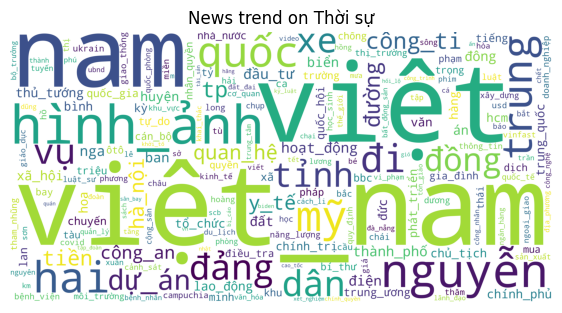

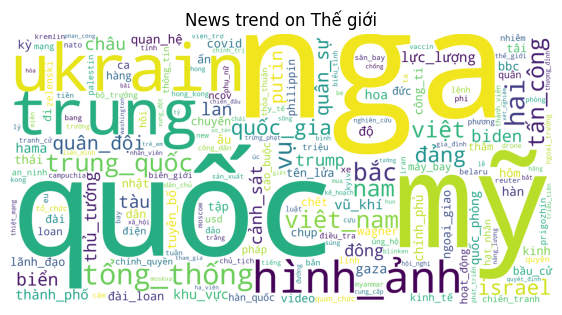

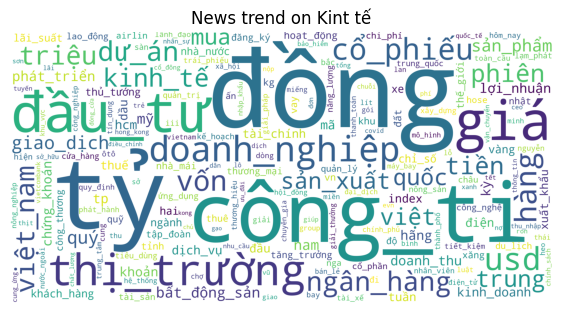

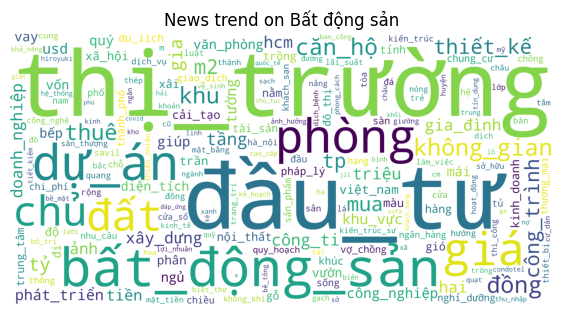

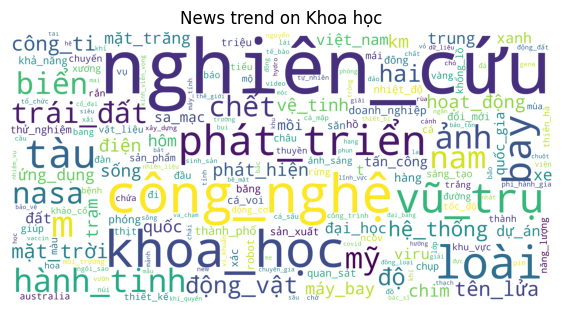

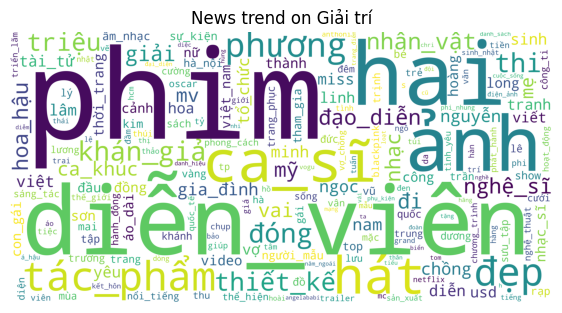

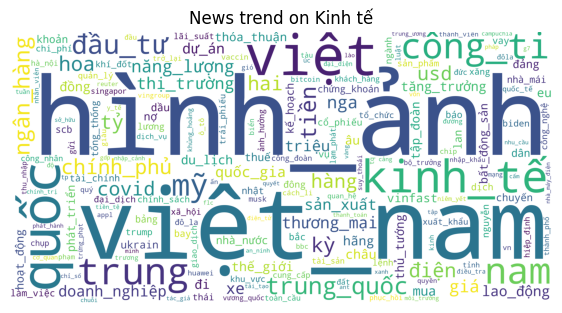

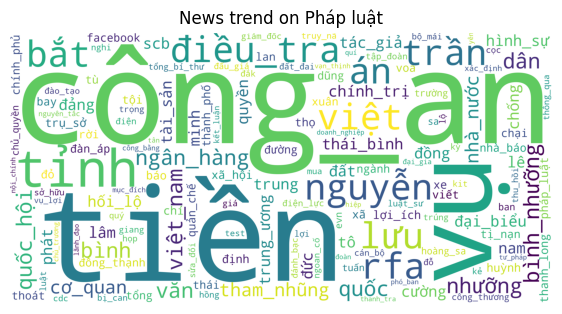

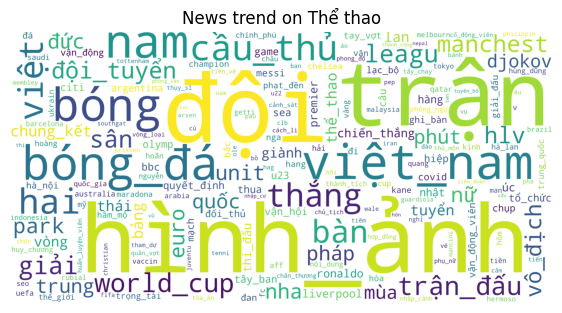

In [10]:
general_topic = list(df.topic.unique())
general_topic.remove(None)
plt.rcParams['figure.figsize'] = [7, 5]

grouped_df = df.groupby(['topic'])
for t in general_topic:
    tmp = grouped_df.get_group(t)
    visualize_frequency_words(tmp, 'topic_extract', f'News trend on {t}')
    plt.show()

In [12]:
# plt.rcParams['figure.figsize'] = [12, 7]

# grouped_df = df.groupby(['topic'])
# for t in general_topic:
#     tmp = grouped_df.get_group(t)
#     tmp_official = tmp[tmp['label'] == 0]
#     tmp_unofficial = tmp[tmp['label'] == 1]
#     plt.subplot(1, 2, 1)
#     visualize_frequency_words(tmp_official, 'topic_extract', f'News trend on official {t}')
#     plt.subplot(1, 2, 2)
#     visualize_frequency_words(tmp_unofficial, 'topic_extract', f'News trend on unoffical {t}')
#     plt.show()